### 라이브러리 선언

In [338]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon

INF = 1000  # 그림판 크기
LEN = 100   # 처음 사각형의 크기

### 축 그리기 및 사각형 그리기

In [339]:
def draw_axis(ax):
  ax.axhline(0, color='black', alpha=0.3)  # x-axis line
  ax.axvline(0, color='black', alpha=0.3)  # y-axis line
  ax.set_xlim(-INF, INF)
  ax.set_ylim(-INF, INF)
  ax.set_aspect('equal')  # 정사각형 모양으로 backboard 그리기

In [340]:
def draw_trapezoid(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)


In [341]:
def draw_rectangle(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon)

In [342]:
def draw_rectangle2(ax, p1, p2, p3, p4):
  my_polygon = Polygon([p1, p2, p3, p4])
  ax.add_patch(my_polygon) 

In [343]:
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN, LEN])
  p4 = np.array([0, LEN])

  draw_rectangle(ax, p1, p2, p3, p4)

### 본론
#### 1. 변환 구현
* translate(p, dx, dy)
* rotate(p, theta)  
* scale(p, sx, sy)  
* shear_x(p, sx)  
* shear_y(p, sy)  
* reflect_x(p)  
* reflect_y(p)   
* ...

#### 2. 파트 그리기
* draw_cockpit(p1, p2, p3, p4)    # 중앙 조종석
* draw_left_arm(p1, p2, p3, p4)   # 왼쪽 날개축
* draw_left_wing(p1, p2, p3, p4)  # 왼쪽 날개
* draw_right_arm(p1, p2, p3, p4)  # 오른쪽 날개축
* draw_right_wing(p1, p2, p3, p4) # 오른쪽 날개

In [344]:
def draw_cockpit(ax, p1, p2, p3, p4):  # 중앙 조종석
  # 1. 사각형을 원점으로 이동 변환: T(-LEN/2, -LEN/2)
  # q = T(-LEN/2, -LEN/2)p
  q1 = translate(p1, -LEN/2, -LEN/2)
  q2 = translate(p2, -LEN/2, -LEN/2)
  q3 = translate(p3, -LEN/2, -LEN/2)
  q4 = translate(p4, -LEN/2, -LEN/2)

  s = 5
  q1 = scale(q1, s, s)
  q2 = scale(q2, s, s)
  q3 = scale(q3, s, s)
  q4 = scale(q4, s, s)
  
  q1 = rotate(q1, 3.14/4.0)
  q2 = rotate(q2, 3.14/4.0)
  q3 = rotate(q3, 3.14/4.0)
  q4 = rotate(q4, 3.14/4.0)

  # 4. polygon 그리기 
  draw_rectangle(ax, q1, q2, q3, q4)

In [345]:
def draw_object2(ax):
  p1 = np.array([0, 0])
  p2 = np.array([1.2*LEN, 2.3*LEN])
  p3 = np.array([1.2*LEN,10*LEN])
  p4 = np.array([0,12.3*LEN])

  draw_left_wing(ax, p1, p2, p3, p4)
  draw_right_wing(ax, p1, p2, p3, p4)

In [346]:
def draw_left_wing(ax, p1, p2, p3, p4):  # 좌측날개
  q1 = translate(p1,-8.75*LEN, -6.25*LEN)
  q2 = translate(p2,-8.75*LEN, -6.25*LEN)
  q3 = translate(p3,-8.75*LEN, -6.25*LEN)
  q4 = translate(p4,-8.75*LEN, -6.25*LEN)
  
  draw_trapezoid(ax, q1, q2, q3, q4)

In [347]:
def draw_right_wing(ax, p1, p2, p3, p4):  # 우측날개
    # 좌표 y값 대칭
  q1 = reflect_y(p1)
  q2 = reflect_y(p2)
  q3 = reflect_y(p3)
  q4 = reflect_y(p4)

  # 좌표 x값 이동 및 y값 대칭
  q1 = translate(q1, 8.75*LEN, -6.25*LEN)
  q2 = translate(q2, 8.75*LEN, -6.25*LEN)
  q3 = translate(q3, 8.75*LEN, -6.25*LEN)
  q4 = translate(q4, 8.75*LEN, -6.25*LEN)

  draw_trapezoid(ax, q1, q2, q3, q4)


In [370]:
def draw_object3(ax):
  p1 = np.array([[-1*LEN, 0]])
  p2 = np.array([[6*LEN,0]])
  p3 = np.array([[6*LEN,0.95*LEN]])
  p4 = np.array([[-1*LEN,0.95*LEN]])

  draw_upper_right(ax,p1,p2,p3,p4)
  draw_upper_left(ax,p1,p2,p3,p4)
  draw_lower_right(ax,p1,p2,p3,p4)
  draw_lower_left(ax,p1,p2,p3,p4)


In [349]:
def reflect_x(p):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1,0,0],[0,-1,0],[0,0,1]])
  q = np.dot(m,hp)
  q = np.array([q[0],q[1]])
  return q

def reflect_y(p):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[-1,0,0],[0,1,0],[0,0,1]])
  q = np.dot(m,hp)
  q = np.array([q[0],q[1]])
  return q

def reflect_x_y(p):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[-1,0,0],[0,-1,0],[0,0,1]])
  q = np.dot(m,hp)
  q = np.array([q[0],q[1]])
  return q


In [350]:
def draw_upper_right(ax,p1,p2,p3,p4):
  q1 = translate1(p1,1.5*LEN,150)
  q2 = translate1(p2,1.5*LEN,150)
  q3 = translate1(p3,1.5*LEN,150)
  q4 = translate1(p4,1.5*LEN,150)

  q1 = rotate(q1,-3.14/12)
  q2 = rotate(q2,-3.14/12)
  q3 = rotate(q3,-3.14/12)
  q4 = rotate(q4,-3.14/12)

  draw_rectangle2(ax, q1, q2, q3, q4)
  return q1, q2, q3, q4

In [351]:
def draw_upper_left(ax,p1,p2,p3,p4):
  q1, q2, q3, q4 = draw_upper_right(ax, p1, p2, p3, p4)
  q1 = reflect_y(q1)
  q2 = reflect_y(q2)
  q3 = reflect_y(q3)
  q4 = reflect_y(q4)
  
  draw_rectangle2(ax, q1, q2, q3, q4)

In [352]:
def draw_lower_right(ax,p1,p2,p3,p4):
  q1, q2, q3, q4 = draw_upper_right(ax, p1, p2, p3, p4)
  q1 = reflect_x(q1)
  q2 = reflect_x(q2)
  q3 = reflect_x(q3)
  q4 = reflect_x(q4)
  draw_rectangle2(ax, q1, q2, q3, q4)

In [353]:
def draw_lower_left(ax,p1,p2,p3,p4):
  q1, q2, q3, q4 = draw_upper_right(ax, p1, p2, p3, p4)
  q1 = reflect_x_y(q1)
  q2 = reflect_x_y(q2)
  q3 = reflect_x_y(q3)
  q4 = reflect_x_y(q4)
  draw_rectangle2(ax, q1, q2, q3, q4)

In [363]:
def draw_object3(ax):
  p1 = np.array([[0, 0]])
  p2 = np.array([[6.3*LEN,0]])
  p3 = np.array([[6.3*LEN,0.95*LEN]])
  p4 = np.array([[0,0.95*LEN]])

  draw_upper_right(ax,p1,p2,p3,p4)
  draw_upper_left(ax,p1,p2,p3,p4)
  draw_lower_right(ax,p1,p2,p3,p4)
  draw_lower_left(ax,p1,p2,p3,p4)


In [355]:
def scale(p, sx, sy):
    # 1. 동차좌표계 (homogeneous coordinate)으로 변환
    hp = np.array([p[0], p[1], 1.0])
    
    # 2. 스케일 변환 행렬 생성
    m = np.array([[sx, 0.0, 0.0], [0.0, sy, 0.0], [0.0, 0.0, 1.0]])
    
    # 3. 행렬과 벡터의 곱
    q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

    # 4. 2차원 좌표계로 변환
    q = np.array([q[0], q[1]])
    return q


In [356]:
# 점 p를 x축 방향으로 dx만큼, y축 방향으로 dy만큼 이동시킨 점 q를 구할 것
# q = T(dx, dy) p1
def translate(p, dx, dy):
  # 1. 동차좌표계 (homogeneous coordinate)으로 변환
  hp = np.array([p[0], p[1], 1.0])

  # 2. 이동 변환 행렬 생성
  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  # 3. 행렬과 벡터의 곱
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
  #print(q)

  # 4. 2차원 좌표계로 변환
  q = np.array([q[0], q[1]])
  return q

In [357]:
def translate1(p, dx, dy):
  hp = np.array([p[0][0], p[0][1], 1.0])

  m = np.array([[1.0, 0.0, dx], [0.0, 1.0, dy], [0.0, 0.0, 1.0]])
  
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)

  q = np.array([q[0], q[1]])
  return q

In [358]:
def rotate(p, theta):
  # Create rotation matrix
  c, s = np.cos(theta), np.sin(theta)
  R = np.array([[c, -s], [s, c]])

  # Apply rotation to point
  return np.dot(R, p)


In [359]:
# 2. tiefigher 그리기
def draw_object(ax):
  p1 = np.array([0, 0])
  p2 = np.array([LEN, 0])
  p3 = np.array([LEN,LEN])
  p4 = np.array([0, LEN])

  # 1. 중앙 조종석 그리기
  draw_cockpit(ax, p1, p2, p3, p4)

### 3. main

In [360]:
def shear_x(p, sx):
  hp = np.array([p[0], p[1], 1.0])
  m = np.array([[1.0, sx, 0.0], [0.0, 1.0, 0.0], [0.0, 0.0, 1.0]])
  q = np.dot(m, hp)
  q = np.array([q[0], q[1]])    
  return q


In [361]:
def shear_y(p, sy):
  # 1. Homogeneous coordinate
  hp = np.array([p[0], p[1], 1.0])
    
  # 2. Shear transformation matrix
  m = np.array([[1.0, 0.0, 0.0], [sy, 1.0, 0.0], [0.0, 0.0, 1.0]])
    
  # 3. Matrix multiplication
  q = np.dot(m, hp)  # (3,3) x (3,1) -> (3,1)
    
  # 4. Cartesian coordinate
  q = np.array([q[0], q[1]])
    
  return q

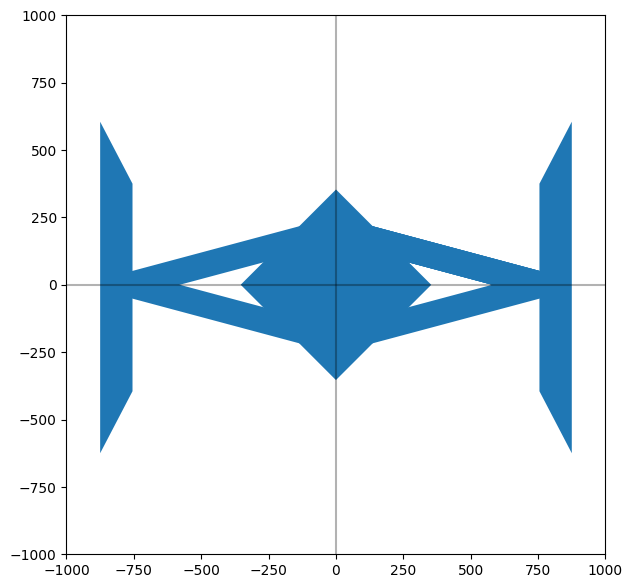

In [371]:
# 그림판 선언 및 크기 설정
fig, ax = plt.subplots(figsize=(7,7))


# 축 그리기
draw_axis(ax)

# 물체 그리기
draw_object(ax)
draw_object2(ax)
draw_object3(ax)

plt.show()